## Speech to Text Modeling

**Downloading the data**

In [6]:
!wget "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"

--2021-11-25 15:18:48--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.167.48
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.167.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: 'speech_commands_v0.01.tar.gz'

     0K .......... .......... .......... .......... ..........  0%  745K 32m31s
    50K .......... .......... .......... .......... ..........  0% 3.91M 19m17s
   100K .......... .......... .......... .......... ..........  0% 6.44M 14m5s
   150K .......... .......... .......... .......... ..........  0% 1.62M 14m12s
   200K .......... .......... .......... .......... ..........  0% 17.4M 11m38s
   250K .......... .......... .......... .......... ..........  0% 12.4M 10m1s
   300K .......... .......... .......... .......... ..........  0% 2.70M 9m50s
   350K .......... .......... .......... ..

**Unzip the tar file**

In [14]:
import tarfile
file = tarfile.open('speech_commands_v0.01.tar.gz')
file.extractall('./Speech')
file.close()

**Delete the extra files of extracted file**

*1. LICENSE*

*2. README.md*

*3. testing_list.txt*

*4. validation_list.txt*

**Import the packages (multi-class classification problem)**

In [1]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

**Data Exploration and Visualization**

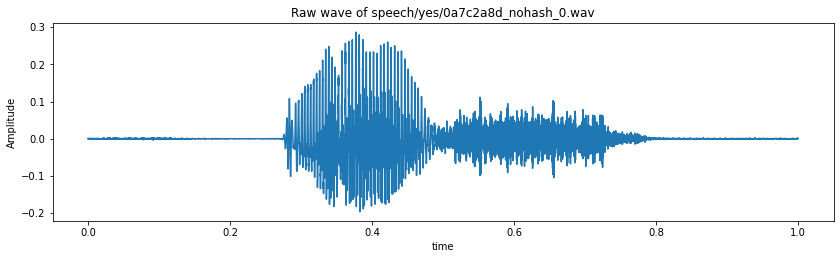

In [2]:
train_audio_path = 'speech/'
samples,sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav',sr = 16000)
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'speech/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel("Amplitude")
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

**Sampling Rate**

In [3]:
ipd.Audio(samples, rate = sample_rate)
print(sample_rate)

16000


**Resampling**

In [4]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate = 8000)

**Number of recording of each voices**

In [5]:
labels = os.listdir(train_audio_path)
labels

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

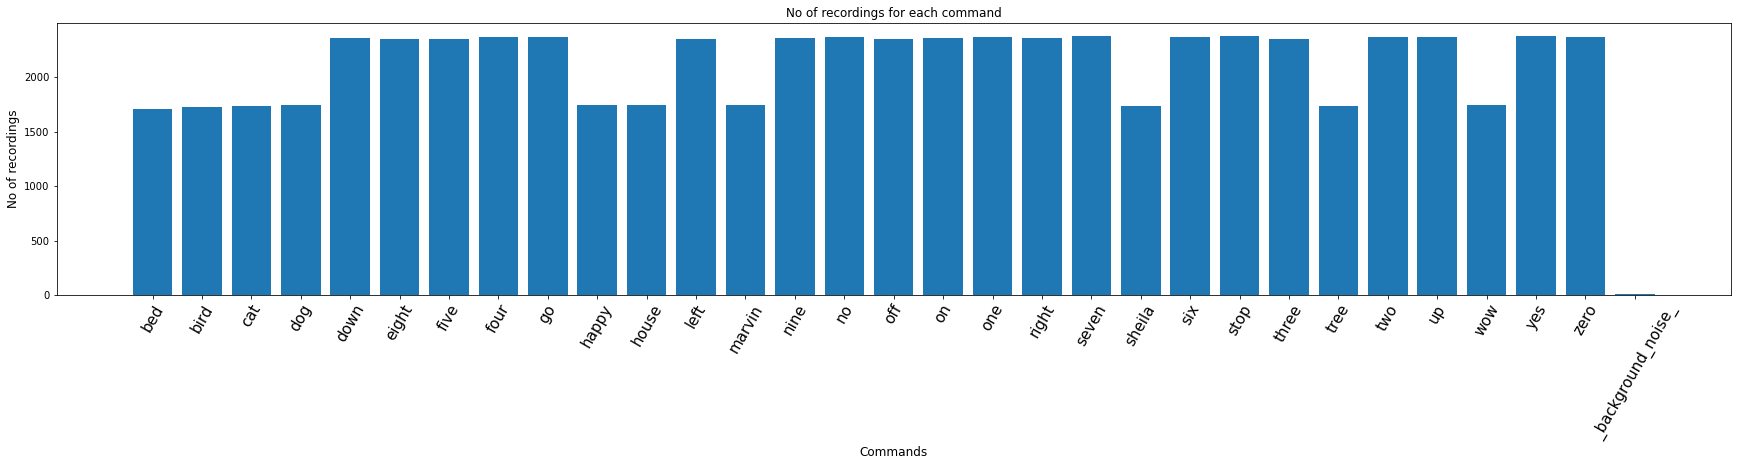

In [6]:
# find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel("Commands" ,fontsize = 12)
plt.ylabel("No of recordings", fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation = 60)
plt.title("No of recordings for each command")
plt.show()

labels=['yes', 'no', 'up', 'down','left', 'right', 'on', 'off', 'stop', 'go']

**Duration of recordings**

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

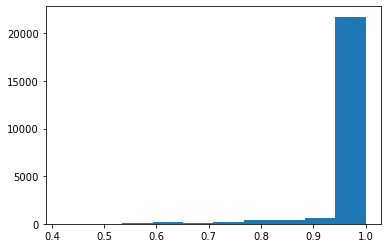

In [7]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/' + label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate,samples = wavfile.read(train_audio_path + '/' + label + '/'+ wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
plt.hist(np.array(duration_of_recordings))        

**Preprocessing the audio waves (it will take an hour to run)**

In [8]:
train_audio_path = 'speech'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/' + label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr=16000)
        samples = librosa.resample(samples, sample_rate,8000)
        if (len(samples)==8000):
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


**One-hot encoding for multi-class classification problem**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y =le.fit_transform(all_label)
classes = list(le.classes_)

In [13]:
!pip install np_utils
from keras.utils import np_utils
y = np_utils.to_categorical(y,num_classes = len(labels))
all_waves=np.array(all_wave).reshape(-1,8000,1)

**Split into train and validation set**

In [14]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(np.array(all_wave),np.array(y),stratify = y,test_size = 0.2, random_state=7)

**Model Architecture**

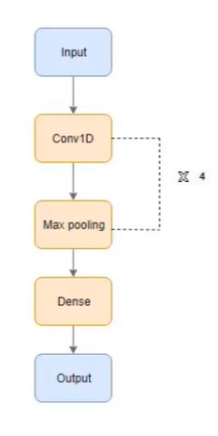

**Model building**

In [16]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4

Found existing installation: keras 2.7.0
Uninstalling keras-2.7.0:
  Successfully uninstalled keras-2.7.0
Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2


Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 93, in run
    uninstall_pathset.commit()
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 450, in commit
    self._moved_paths.commit()
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 290, in commit
    save_dir.cleanup()
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 199, in cleanup
    rmtree(ensure_text(self._path))
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_vendor\retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "C:\Users\DELL\anaconda3\lib\site-packages\pip\_vendor\retrying.py", line 212, in call
    raise att

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached numpy-1.18.5-cp38-cp38-win_amd64.whl (12.8 MB)
  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you'll have keras 2.4.0 which is incompatible.


In [22]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
K.clear_session()

In [25]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation = 'relu',strides = 1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16,11, padding='valid', activation = 'relu',strides = 1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32,9, padding='valid', activation = 'relu',strides = 1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64,7, padding='valid', activation = 'relu',strides = 1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256,activation='relu')(conv)
cpnv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation = 'softmax')(conv)

model= Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [27]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10, min_delta = 0.0001)
mc = ModelCheckpoint("best_model.hdf5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

In [28]:
history = model.fit(x_tr, y_tr, epochs = 100, callbacks= [es,mc], batch_size =32, validation_data = (x_val, y_val))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
533/533 [==============================] - ETA: 0s - loss: 1.9822 - accuracy: 0.2517WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000157F3CB0700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, s

In [30]:
model.save("best_model.hdf5")

**Diagnostic plot**

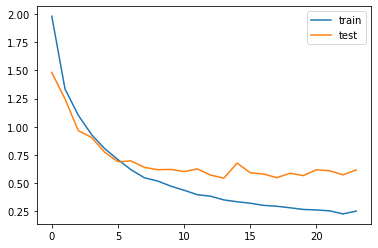

In [29]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.legend()
pyplot.savefig('pyplot.jpg')
pyplot.show()

**Loading the best model**

In [31]:
from tensorflow.keras.models import load_model
model = load_model('best_model.hdf5')
def predict(audio):
    prob = model.predict(audio.reshape(1,8000,1))
    index = np.argmax(prob[0])
    return classes[index]

In [60]:
import random
index = random.randint(0,len(x_val)-1)
samples = x_val[index].ravel()
print('Audio: ', classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate = 8000)
print('Text: ', predict(samples))

Audio:  right
Text:  right


**Prediction on validation data**

In [69]:
l=len(x_val)
k=0
i=0
for i in range(l-1):
    samples = x_val[i].ravel()
    s1 =  classes[np.argmax(y_val[i])]
    ipd.Audio(samples, rate = 8000)
    s2 = predict(samples)
    if s1==s2:
        k=k+1
print("Accuracy: ", (k/l)*100)

Accuracy:  82.9462819610603


**Script that prompts a  user to record voice commands. Record your own voice commands and test it on the model.**

In [93]:
!pip install sounddevice
!pip install soundfile

In [94]:
import sounddevice as sd
import soundfile as sf

In [151]:
samplerate = 16000
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate*duration),samplerate = samplerate,channels = 1, blocking = True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start
end


**Lets now read the saved voice command and convert it to text.**

In [152]:
os.listdir(r'‪C:\Users\DELL'.strip('\u202a'))
filepath = r'‪C:\Users\DELL'.strip('\u202a')

# Reading the voice commands
samples, sample_rate = librosa.load(filepath + '\\' + 'yes.wav',sr =16000)
samples = librosa.resample(samples,sample_rate,8000)
ipd.Audio(samples,rate = 8000)

predict(samples)

'yes'